# CH14: Going Deeper - The Machanics of TensorFlow

## Prerequisites

In [128]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn import metrics
from sklearn.model_selection import train_test_split

## Logistic Regression Model with TensorFlow

### Load IRIS dataset

In [110]:
iris = datasets.load_iris()

df = pd.DataFrame(iris["data"], columns=iris["feature_names"])
df["Species"] = iris["target_names"][iris["target"]]

### Create training and test samples

In [111]:
df = df[:100]
df.Species = df.Species.replace(to_replace=["setosa", "versicolor"], value=[0, 1])

X = df.iloc[:,0:4].values
y = df.Species[:, np.newaxis]

In [112]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)

### Logistic Regression

In [123]:
g = tf.Graph()

with g.as_default():
    tf.set_random_seed(1)
    
    ## placeholders
    tf_x = tf.placeholder(shape=(None, 4), dtype=tf.float32, name="tf_x")
    tf_y = tf.placeholder(shape=(None, 1), dtype=tf.float32, name="tf_y")
    
    ## model parameters
    weights = tf.Variable(
        tf.random_normal(shape=(4, 1), stddev=0.25),
        name="weights"
    )
    bias = tf.Variable(tf.random_normal(shape=(1, 1)), name="bias")
    
    z = tf.add(tf.matmul(tf_x, weights), bias)
    y_hat = tf.sigmoid(z)
    
    cost = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=z, labels=tf_y))
    
    predict = tf.round(y_hat)
    correct = tf.cast(tf.equal(predict, tf_y), dtype=tf.float32)
    accuracy = tf.reduce_mean(correct)
    
    ## train the model
    optim = tf.train.GradientDescentOptimizer(learning_rate=0.001)
    train_op = optim.minimize(cost, name="train_op")

In [124]:
n_epochs = 1000
batch_size = X_train.shape[0]

training_costs = []
train_accuracy = []
test_accuracy = []

with tf.Session(graph=g) as sess:
    sess.run(tf.global_variables_initializer())
    
    for e in range(n_epochs):
        
        batch_index = np.random.choice(X_train.shape[0], size=batch_size)
        X_train_batch = X_train[batch_index]
        y_train_batch = y_train[batch_index]
    
        c, _ = sess.run([cost, train_op], feed_dict={tf_x: X_train_batch, tf_y: y_train_batch})
        
        temp_train_acc = sess.run(accuracy, feed_dict={tf_x: X_train, tf_y: y_train})
        temp_test_acc = sess.run(accuracy, feed_dict={tf_x: X_test, tf_y: y_test})
        
        training_costs.append(c)
        train_accuracy.append(temp_train_acc)
        test_accuracy.append(temp_test_acc)
    
        if not e % 50:
            print("Epoch %4d: %.4f" % (e, c))
            
    y_hat_train = sess.run(predict, feed_dict={tf_x: X_train})
    y_hat_test = sess.run(predict, feed_dict={tf_x: X_test})

Epoch    0: 1.3375
Epoch   50: 1.0424
Epoch  100: 0.9477
Epoch  150: 0.7256
Epoch  200: 0.5815
Epoch  250: 0.5960
Epoch  300: 0.5580
Epoch  350: 0.5300
Epoch  400: 0.5297
Epoch  450: 0.5019
Epoch  500: 0.4867
Epoch  550: 0.4906
Epoch  600: 0.4681
Epoch  650: 0.4487
Epoch  700: 0.4569
Epoch  750: 0.4333
Epoch  800: 0.4249
Epoch  850: 0.3933
Epoch  900: 0.4053
Epoch  950: 0.3874


In [125]:
print("Train accuracy: %.2f%%" % (100*metrics.accuracy_score(y_train, y_hat_train)))
print("Test accuracy: %.2f%%" % (100*metrics.accuracy_score(y_test, y_hat_test)))

Train accuracy: 100.00%
Test accuracy: 100.00%


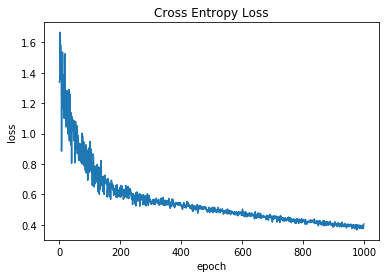

In [130]:
plt.plot(training_costs)
plt.title('Cross Entropy Loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

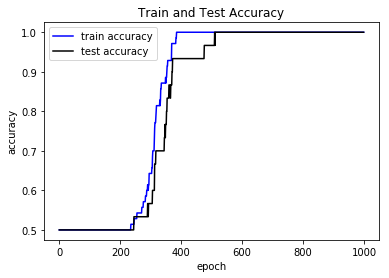

In [134]:
plt.plot(train_accuracy, "b-", label="train accuracy")
plt.plot(test_accuracy, "k-", label="test accuracy")
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.title("Train and Test Accuracy")
plt.legend(loc="best")
plt.show()